In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train, Y_train), (x_test, y_test) = mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train = X_train/255
x_test = x_test/255

In [ ]:

model = Sequential()

In [ ]:
# model.add(Flatten(input_shape=(28,28)))
# model.add(Dense(56, activation='relu'))

# model.add(Dense(10, activation='softmax'))


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add Flatten layer with input shape (28, 28)
model.add(Flatten(input_shape=(28, 28)))

# Add Dense layer with 56 units and 'relu' activation
model.add(Dense(128, activation='relu'))
# Add Dropout layer with a dropout rate of 0.5 (adjust as needed)
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.3))

# Add Dense layer with 10 units and 'softmax' activation
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

In [ ]:


model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])


In [ ]:
epochs = 50
batch_size = 512

from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

history = model.fit(
    x_train, y_train,

    epochs=epochs,
    verbose=1,
    validation_data=(x_validate, y_validate)
)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0840 - accuracy: 0.9741 - val_loss: 0.0901 - val_accuracy: 0.9764
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0852 - accuracy: 0.9743 - val_loss: 0.0947 - val_accuracy: 0.9758
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0811 - accuracy: 0.9746 - val_loss: 0.0852 - val_accuracy: 0.9768
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0835 - accuracy: 0.9747 - val_loss: 0.0860 - val_accuracy: 0.9776
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0798 - accuracy: 0.9759 - val_loss: 0.0931 - val_accuracy: 0.9754
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0810 - accuracy: 0.9748 - val_loss: 0.0896 - val_accuracy: 0.9772
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0767 - accuracy: 0.9767 - val_loss: 0.0917 - val_accuracy:

In [ ]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[ 965    1    1    2    0    3    5    1    1    1]
 [   0 1127    3    0    0    1    2    0    2    0]
 [   1    3 1008    7    3    1    1    5    3    0]
 [   0    0    5  997    0    2    0    4    2    0]
 [   1    0    3    0  963    0    5    1    0    9]
 [   2    1    0   13    2  865    5    0    3    1]
 [   5    3    0    1    3    4  938    0    4    0]
 [   2    8    7    5    0    0    0  999    0    7]
 [   4    2    2    8    5    9    5    3  930    6]
 [   2    5    0    7   22    4    2    4    2  961]]


0.9753

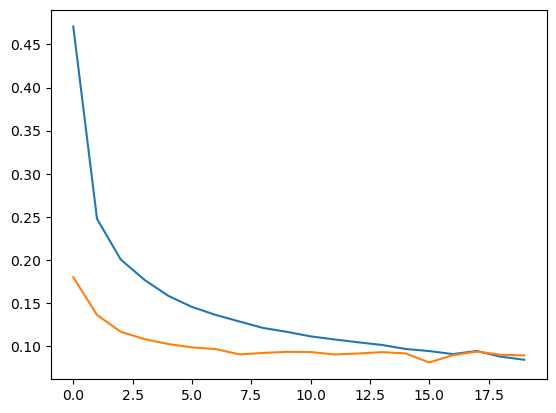

In [ ]:
plt.plot(history.history['loss'], )
plt.plot(history.history['val_loss'])

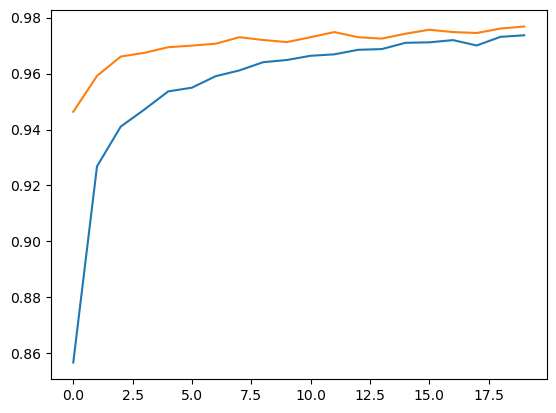

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 [==============================] - 0s 26ms/step


array([3], dtype=int64)

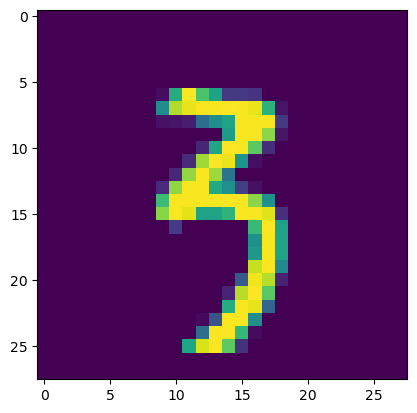

In [ ]:
plt.imshow(x_test[699])
model.predict(x_test[699].reshape(1,28,28)).argmax(axis=1)

In [ ]:
import cv2

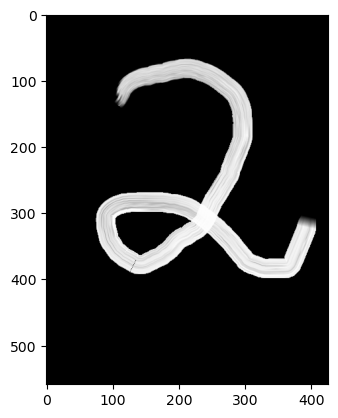

In [ ]:
file = r'C:\Users\LENOVO\Desktop\speech\twooos.png'
image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')



1/1 [==============================] - 0s 80ms/step


array([2], dtype=int64)

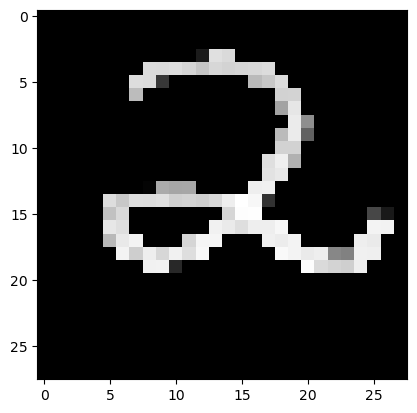

In [ ]:
resized_image = cv2.resize(image, (28,28), interpolation=cv2.INTER_LINEAR)

plt.imshow(resized_image, cmap='gray')

model.predict(resized_image.reshape(1,28,28)).argmax(axis=1)

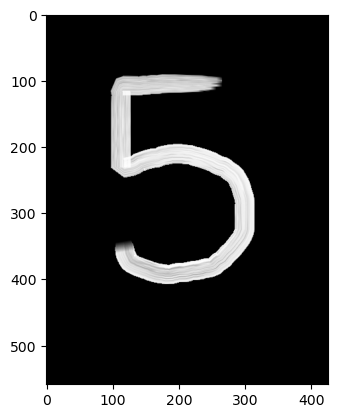

In [ ]:
file = r'C:\Users\LENOVO\Desktop\speech\fuuve.png'
image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')

1/1 [==============================] - 0s 12ms/step


array([5], dtype=int64)

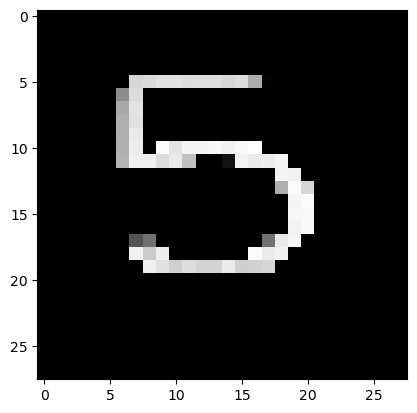

In [ ]:
resized_image = cv2.resize(image, (28,28), interpolation=cv2.INTER_LINEAR)

plt.imshow(resized_image, cmap='gray')

model.predict(resized_image.reshape(1,28,28)).argmax(axis=1)

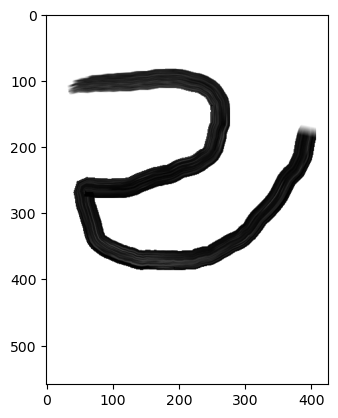

In [ ]:
file = r'C:\Users\LENOVO\Desktop\speech\asss.png'
image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')

1/1 [==============================] - 0s 20ms/step


array([5], dtype=int64)

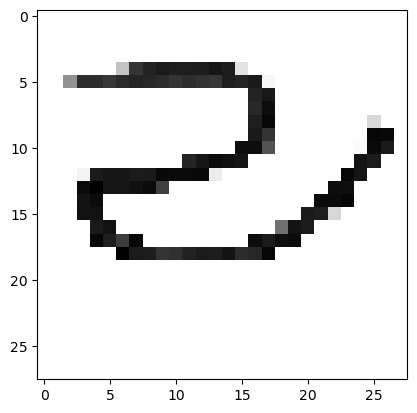

In [ ]:
resized_image = cv2.resize(image, (28,28), interpolation=cv2.INTER_LINEAR)

plt.imshow(resized_image, cmap='gray')

model.predict(resized_image.reshape(1,28,28)).argmax(axis=1)

In [ ]:
#   ANOTHER MODEL

# Create a Sequential model
model = Sequential()

# Add Flatten layer with input shape (28, 28)
model.add(Flatten(input_shape=(28, 28)))

# Add Dense layer with 56 units and 'relu' activation
model.add(Dense(128, activation='relu'))


model.add(Dense(64, activation='relu'))



# Add Dense layer with 10 units and 'softmax' activation
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [ ]:
epochs = 50
batch_size = 512

from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

history = model.fit(
    x_train, y_train,

    epochs=epochs,
    verbose=1,
    validation_data=(x_validate, y_validate)
)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.9199 - val_loss: 0.1378 - val_accuracy: 0.9586
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1123 - accuracy: 0.9657 - val_loss: 0.1157 - val_accuracy: 0.9651
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0776 - accuracy: 0.9762 - val_loss: 0.0893 - val_accuracy: 0.9722
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0589 - accuracy: 0.9814 - val_loss: 0.0883 - val_accuracy: 0.9742
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0461 - accuracy: 0.9857 - val_loss: 0.0938 - val_accuracy: 0.9732
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.0915 - val_accuracy: 0.9745
Epoch 7/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0301 - accuracy: 0.9900 - val_loss: 0.0935 - val_accuracy:

In [ ]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[ 968    0    1    1    0    1    2    2    2    3]
 [   0 1128    5    0    0    0    0    0    2    0]
 [   3    2 1012    1    3    0    1    8    2    0]
 [   0    1    6  987    0    4    0    6    4    2]
 [   0    0    3    0  964    0    2    1    1   11]
 [   3    0    0   10    2  864    3    2    4    4]
 [   7    1    0    0    9    6  932    0    3    0]
 [   0    3    5    0    0    0    0 1016    3    1]
 [   0    0    7    5    4    1    0    5  946    6]
 [   1    4    1    4   10    2    1   11    2  973]]


0.979

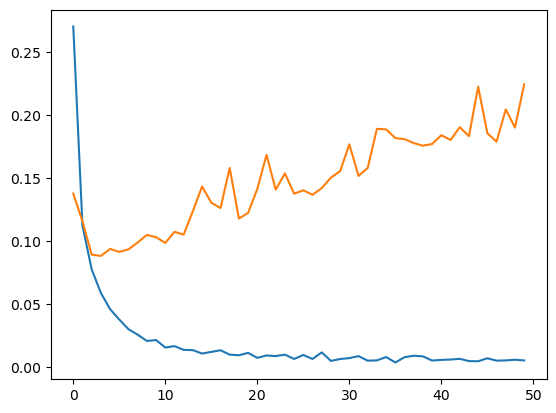

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

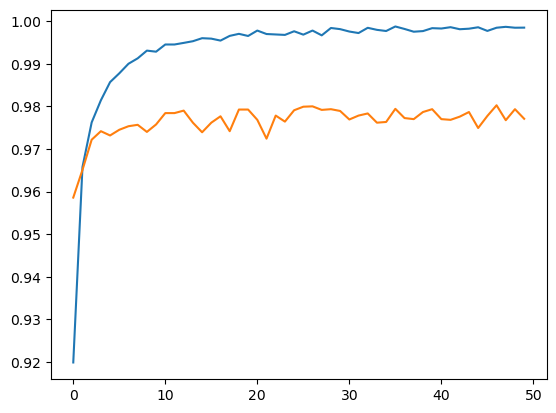

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])